In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def randomized_response(p, n, gamma):
    Y = np.random.binomial(1, p, n) # n people, roughly p cheating, 1 is cheating
    flip = np.random.binomial(1, 0.5-gamma, n) # 1 is person lies to you with probability 0.5+gamma
    Y_flip = abs(flip - Y)
    phat = np.mean((1/(2*gamma))*(Y_flip-0.5+gamma))
    return phat
    
print(randomized_response(0.2, 10000, 0.25))

0.1948


In [13]:
p = [0.1, 0.2]
n = [50, 100, 1000]
gamma = [0.1, 0.25, 0.4]
colors = ['#1bebf2', '#219fff', '#1b29f2']

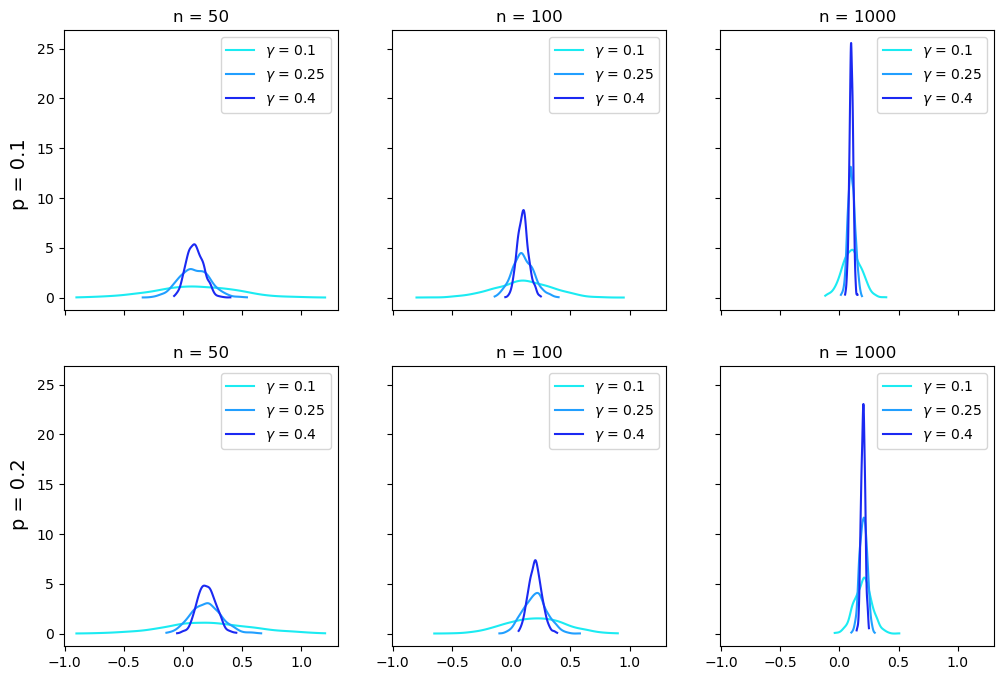

In [14]:
fig, axs = plt.subplots(len(p), len(n), figsize=(12, 8), sharex=True, sharey=True)
for pi in range(len(p)):
    for nj in range(len(n)):
        for gk in range(len(gamma)):
            phats = np.zeros(1000)
            for i in range(1000):
                phats[i] = randomized_response(p[pi], n[nj], gamma[gk])
            kde = gaussian_kde(phats) # courtesy of chatGPT
            x = np.linspace(min(phats), max(phats), 100) # smooths line to histogram centers
            axs[pi, nj].plot(x, kde(x), color=colors[gk], label = f'$\gamma$ = {gamma[gk]}')
            axs[pi, nj].legend()
            axs[pi][nj].set_title(f'n = {n[nj]}')
fig.text(0.08, 0.7, 'p = 0.1', va='center', rotation='vertical', size = 14)
fig.text(0.08, 0.3, 'p = 0.2', va='center', rotation='vertical', size = 14)
plt.show()